# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.033702e+01     8.350828e+00
 * time: 0.004068136215209961
     1     2.667546e+01     5.748044e+00
 * time: 0.011927127838134766
     2     2.102545e+01     7.798572e+00
 * time: 0.029855966567993164
     3     1.222187e+01     1.611307e+00
 * time: 0.051058053970336914
     4     1.084336e+01     1.423199e+00
 * time: 0.06538915634155273
     5     1.026859e+01     1.005265e+00
 * time: 0.07963705062866211
     6     9.765127e+00     8.621469e-01
 * time: 0.09395003318786621
     7     9.302269e+00     6.824985e-01
 * time: 0.10829806327819824
     8     9.089605e+00     5.222732e-01
 * time: 0.12305307388305664
     9     8.937483e+00     6.824404e-01
 * time: 0.13799500465393066
    10     8.843335e+00     5.644963e-01
 * time: 0.15282011032104492
    11     8.758765e+00     4.663196e-01
 * time: 0.16743898391723633
    12     8.750040e+00     6.809290e-01
 * time: 0.178725004196167
    13     8.688933e+00     6.006035e-01
 * tim

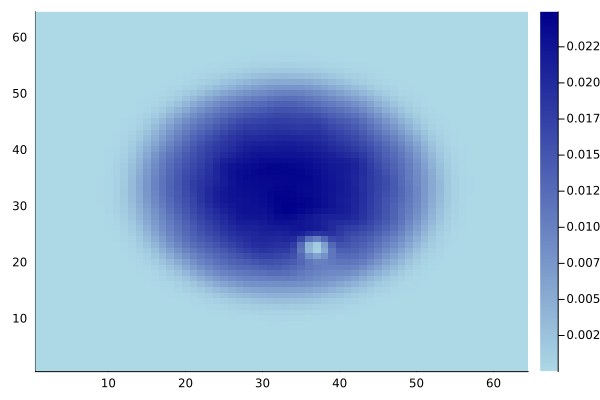

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)